<div class="alert alert-block alert-info">
    
***Three type of customers from a popular franchise store were classified as A, B and C based on their spending habits. The group of customers had their customer statisfaction measured out a total of 5 points and the scores were subsequently recorded for a period of time in the file titled "Customer Satisfaction.csv"(Attached). The franchise would like investigate if the satisfaction by the three groups of customers is significantly different. The data is clean.***

# ***1. Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

# ***2. Import Data***

In [2]:
customer_satisfaction = pd.read_csv('C:\\Users\\a0008578\\Desktop\\Jupyter Notebooks\\Customer Satisfaction.csv') #Import data

# ***3. Exploratory Data Analysis***

## ***3.1. Explore shape of data frame***

In [3]:
print(customer_satisfaction) #Displays the data

   Customer Type  Overall Satisfaction
0              B                  3.54
1              C                  3.16
2              B                  2.42
3              B                  2.70
4              C                  3.31
..           ...                   ...
95             A                  2.56
96             B                  4.40
97             B                  4.72
98             A                  2.90
99             C                  3.98

[100 rows x 2 columns]


In [4]:
customer_satisfaction.info() #Displays number of columns, non values in each column and type of variables in each column
customer_satisfaction.shape  #Reports the maximum number of observations and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Type         100 non-null    object 
 1   Overall Satisfaction  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


(100, 2)

## ***3.2. Numeric summaries***

In [5]:
customer_satisfaction.groupby('Customer Type').describe() #Calculates summmary statistics for A, B & C customer groups

Overall Satisfaction                                          \
                             count      mean       std   min     25%   50%   
Customer Type                                                                
A                             31.0  3.393548  0.824680  1.72  2.8550  3.56   
B                             42.0  4.205238  0.621200  2.42  3.8475  4.34   
C                             27.0  3.641111  0.670478  2.19  3.2500  3.51   

                             
                  75%   max  
Customer Type                
A              4.0050  4.80  
B              4.6975  4.98  
C              4.1400  4.93

In [6]:
customer_satisfaction.groupby('Customer Type').agg(pd.Series.mode) #Calculates summmary statistics for  A, B & C customer groups

,Overall Satisfaction
Customer Type,
A,4.67
B,"[4.53, 4.91]"
C,"[2.19, 2.64, 2.88, 3.04, 3.12, 3.16, 3.24, 3.2..."


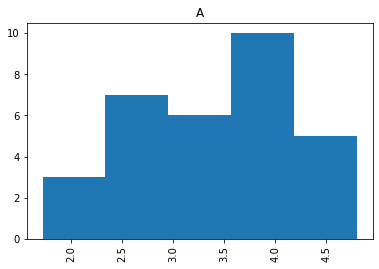

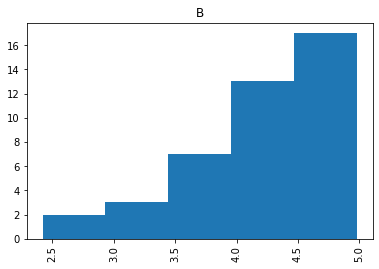

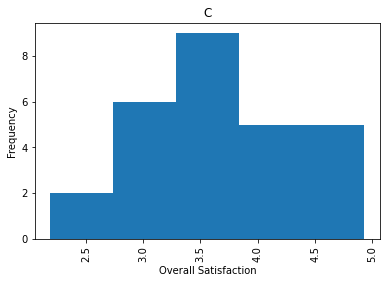

In [7]:
customer_satisfaction.groupby('Customer Type').hist(by=customer_satisfaction['Customer Type'], bins=5) #Plots histogram for A, B & C customer groups (Number bins can be adjusted to get a "better" looking histogram)
plt.xlabel('Overall Satisfaction')                                                                     #Labls x-axis
plt.ylabel('Frequency');                                                                               #Labels y-axis

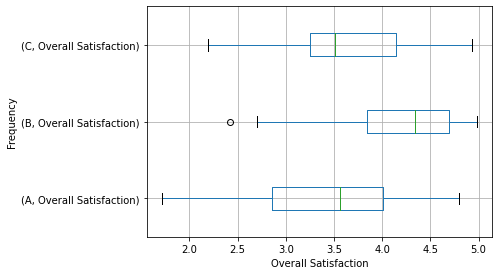

In [8]:
customer_satisfaction.groupby('Customer Type').boxplot('Overall Satisfaction', vert=False) #Plots histogram for A, B & C customer groups
plt.xlabel('Overall Satisfaction')                                                         #Labels x-axis
plt.ylabel('Frequency');                                                                   #Labels y-axis

plt.subplots_adjust(left=0.1,                                                              #Adjusts spacing between plots to improve visualisation quality   
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

# ***5. Normality Checks***

## ***5.1. Compare Mean, Mode and Median***

<div class="alert alert-block alert-info">

|Group | Mean | Median |Mode|Comment|
| --- | --- | --- |--- |--- |
| A |3.4 | 3.6 |4.7|mean<median<mode, Not normal, negative skewness|
| B |4.2 | 4.3 |4.5, 4.9 |mean<median<mode, Not normal, negative skewness|
| C |3.6 | 3.5 |2.9,...,3.2|mean>median>mode, Not normal, positive skewness|
    
 ***Overall, the sample data for all three groups does not appear to come from a normal distribution***

## ***5.2. Analyse Histograms and Boxplots***

<div class="alert alert-block alert-info">
    
***Groups A and B - show negative skewness (More data is to the right of the histogram and the median line on the boxplot is to the right)***

***Groups C - shows positive skewness (More data is to the left of the histogram and the median line on the boxplot is to the left)***
 

## ***5.3. Normal Probability Plots***

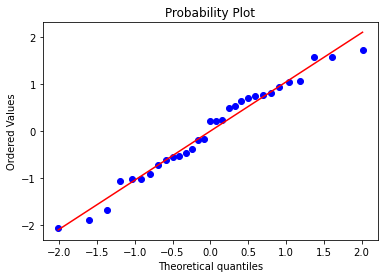

In [9]:
groupA = list(customer_satisfaction[customer_satisfaction['Customer Type'] == 'A']['Overall Satisfaction'])  #Creates ordered data for the specific group
n_groupA = stats.zscore(groupA)                                                                              #N-score transformation
stats.probplot(n_groupA, dist = 'norm', plot=pylab)                                                          #Calculates quantiles of sample data against those of a normal distribution                                                            
pylab.show()                                                                                                 #Displays the normal probability plot

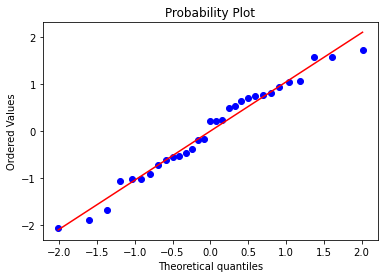

In [10]:
groupB = list(customer_satisfaction[customer_satisfaction['Customer Type'] == 'B']['Overall Satisfaction']) #Creates ordered data for the specific group
n_groupB = stats.zscore(groupA)                                                                             #N-score transformation
stats.probplot(n_groupB, dist = 'norm', plot=pylab)                                                         #Calculates quantiles of sample data against those of a normal distribution   
pylab.show()                                                                                                #Displays the normal probability plot

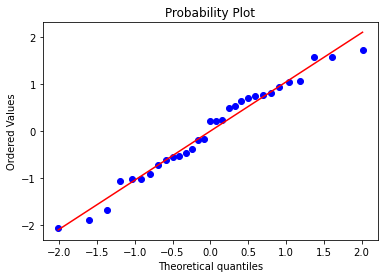

In [11]:
groupC = list(customer_satisfaction[customer_satisfaction['Customer Type'] == 'C']['Overall Satisfaction']) #Displays the normal probaility plot
n_groupC = stats.zscore(groupC)                                                                             #N-score transformation
stats.probplot(n_groupB, dist = 'norm', plot=pylab)                                                         #Calculates quantiles of sample data against those of a normal distribution 
pylab.show()                                                                                                #Displays the normal probability plot

<div class="alert alert-block alert-info">
 
 ***All normal probability plots show minor departures from normality.***


## ***5.4. Calculate Skewness***

In [12]:
from scipy.stats import kurtosis
from scipy.stats import skew
skew(groupA, bias=False) #Calculates skewness for Group A

-0.23516880622277184

<div class="alert alert-block alert-info">
 
***Group A - approximately symmetrical ( Skewness is between 0 & -0.5)***
 

In [13]:
skew(groupB, bias=False) #Calculates skewness for Group B

-0.9679941461074673

<div class="alert alert-block alert-info">
 
 ***Group B - moderately negatively skewed ( Skewness is between -0.5 & -1)*** 

In [14]:
skew(groupC, bias=False) #Calculates skewness for Group C

0.1395708394526358

<div class="alert alert-block alert-info">
 
 ***Group C - approximatetly symmetrical( Skewness is between 0 & 0.5)*** 

## ***5.5. Normality Test: Anderson Darling Test***

In [15]:
from scipy.stats import anderson
anderson(groupA, dist ='norm') #Runs Anderson Darling's normality test for Group A

AndersonResult(statistic=0.31277577576624793, critical_values=array([0.522, 0.595, 0.713, 0.832, 0.99 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">

***Remember:***

***1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***
    
***2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***

***For all significance levels, (Test) Statistic < Critical Values. Therefore, we fail to reject the null hypothesis that the data is normally distributed.***

In [16]:
anderson(groupB, dist ='norm') #Runs Anderson Darling's normality test for Group B

AndersonResult(statistic=0.8262589434245626, critical_values=array([0.533, 0.607, 0.728, 0.849, 1.01 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">

***Remember:***

***1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***
    
***2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***

***For significance levels =<5%, (Test) Statistic > Critical Values. Therefore, reject the null hypothesis that the data is normally distributed.***

In [17]:
anderson(groupC, dist ='norm') #Runs Anderson Darling's normality test for Group C

AndersonResult(statistic=0.3892912984939123, critical_values=array([0.517, 0.589, 0.707, 0.824, 0.98 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<div class="alert alert-block alert-info">

***Remember:***

***1. If (Test) Statistic > Critcal Value, Reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***
    
***2. If (Test) Statistic < Critcal Value, Fail to reject the null hypothesis (Note: Ho for A/D = data are normally distributed)***

***For significance levels =<5%, (Test) Statistic > Critical Values. Therefore, reject the null hypothesis that the data is normally distributed.***

# ***6. Equal Variance Test***

<div class="alert alert-block alert-info">
    
***Since there is no  sufficient evidence to support that Group B is normally distributed at significance level of 5% or less. The equal variance test to use is the Levene Test which is robust for non-normal data.***

In [18]:
stats.levene(groupA, groupB, groupC) #Runs a Levene's Test for Equal Variances

LeveneResult(statistic=2.21526701314763, pvalue=0.11461635117632656)

<div class="alert alert-block alert-info">

***Remember:***

***Levene's test: Ho: Variance 1 = Variance 2***
    
***P-value <0.05, Reject the null hypothesisx***
               
***P-value >0.05, Fail to reject the null hypothesis***

***Here, p-value > 0.05, therefore we fail reject the null hypothesis that the variances of Group A, B and C are equal. Therefore, we use one way Anova, if the variances were proven to be unequal, we use Welch's ANOVA *** 

# ***7. One Way ANOVA***

In [19]:
stats.f_oneway(groupA, groupB, groupC) #Runs one way ANOVA

F_onewayResult(statistic=12.85565288372719, pvalue=1.115647780308464e-05)

<div class="alert alert-block alert-info">
   

***One-way ANOVA: Ho: Mean 1 = Mean 2 = Mean 3***
    
***P-value <0.05, Reject the null hypothesis***
               
***P-value >0.05, Fail to reject the null hypothesis***

***Here, p-value < 0.05, therefore we reject the null hypothesis that the means of customer satisfaction for the groups A, B and C are equal.***

***Therefore, by looking at the box plots, it can be concluded that Group B has the highest customer satisfication***